In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
pingvin = pd.read_csv('pingvin.csv')

In [3]:
pingvin.isnull().sum()

island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [4]:
pingvin.drop('sex', axis=1, inplace=True)
pingvin.drop('year', axis=1, inplace=True)

In [5]:
pingvin.dropna(inplace=True)

In [6]:
pingvin.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


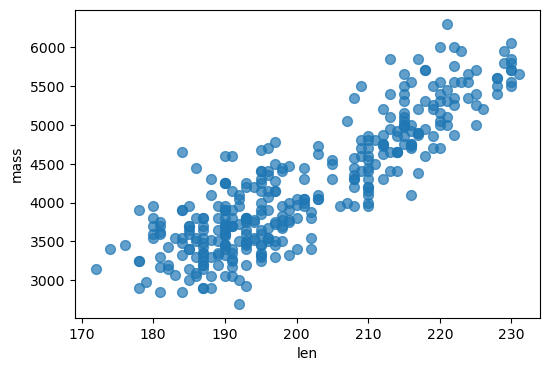

In [7]:
plt.figure(figsize=(6,4))
plt.xlabel('len')
plt.ylabel('mass')
plt.scatter(pingvin['flipper_length_mm'], pingvin['body_mass_g'], s=50, alpha=0.7)

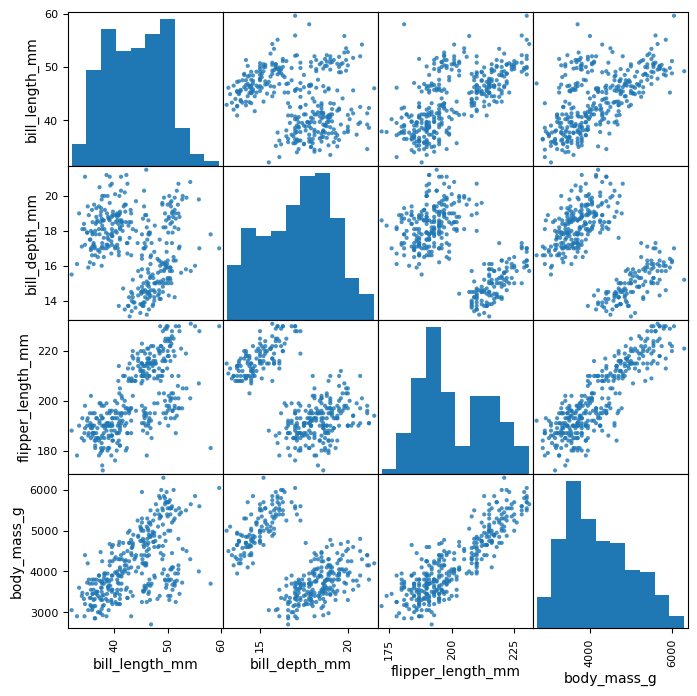

In [8]:
_ = pd.plotting.scatter_matrix(pingvin, alpha=0.8, figsize=(8,8))

In [9]:
pingvin.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Torgersen,39.1,18.7,181.0,3750.0
1,Torgersen,39.5,17.4,186.0,3800.0
2,Torgersen,40.3,18.0,195.0,3250.0
4,Torgersen,36.7,19.3,193.0,3450.0
5,Torgersen,39.3,20.6,190.0,3650.0


In [10]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()
encoded = enc.fit_transform(pingvin[['island']])
pingvin['island2'] = encoded

In [11]:
pingvin.drop('island', axis=1, inplace=True)

In [12]:
pingvin.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island2
0,39.1,18.7,181.0,3750.0,2.0
1,39.5,17.4,186.0,3800.0,2.0
2,40.3,18.0,195.0,3250.0,2.0
4,36.7,19.3,193.0,3450.0,2.0
5,39.3,20.6,190.0,3650.0,2.0


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pingvin_sc = scaler.fit_transform(pingvin.values)

In [14]:
pingvin_sc

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208,  1.85286967],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305,  1.85286967],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234,  1.85286967],
       ...,
       [ 1.04154272,  0.53188718, -0.56371522, -0.53292256,  0.46928577],
       [ 1.26166175,  0.93758646,  0.64701263, -0.1270689 ,  0.46928577],
       [ 1.15160224,  0.78544923, -0.20761879, -0.53292256,  0.46928577]])

In [15]:
from sklearn.cluster import KMeans

cl = KMeans(n_clusters=2, init='random', n_init=10, max_iter=200)
cl.fit(pingvin_sc)
clusters = cl.predict(pingvin_sc)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

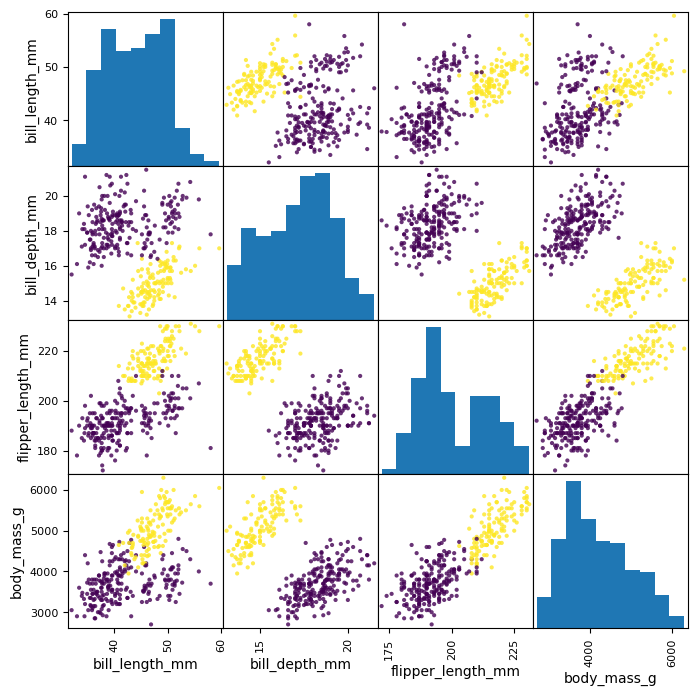

In [16]:
_ = pd.plotting.scatter_matrix(pingvin.loc[:, pingvin.columns != 'island2'], alpha=0.8, figsize=(8,8), c=clusters)

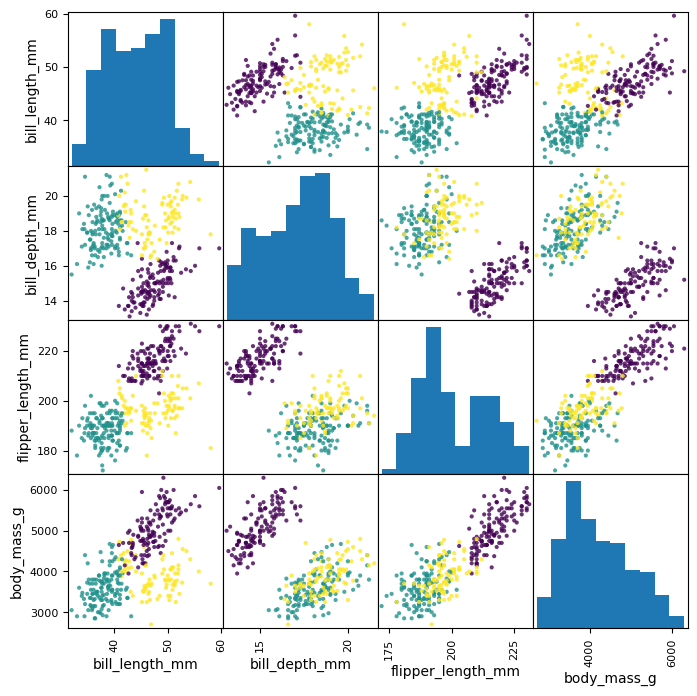

In [17]:
cl = KMeans(n_clusters=3, init='random', n_init=10, max_iter=200)
cl.fit(pingvin_sc)
clusters = cl.predict(pingvin_sc)
_ = pd.plotting.scatter_matrix(pingvin.loc[:, pingvin.columns != 'island2'], alpha=0.8, figsize=(8,8), c=clusters)

In [18]:
# Inertia - a pontok távolságának átlaga a klaszter közepétől
# A klaszterezés akkor jó, ha minél kevesebb klaszterünk van, és minél kissebb az inertia érték

cl.inertia_

560.7688458181775

In [19]:
# A silhouette azt méri, hogy az azonos klaszterben lévő pontok mennyire hasonlítanak a klaszterben lévő többi ponthoz
# és mennyire különböznek más klaszterekben lévő pontoktól
# Minél nagyobb a silhouette érték, annál jobb a klaszterezésünk

from sklearn.metrics import silhouette_score

silhouette_score(pingvin_sc, labels=clusters)

0.40340176653549414

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
stats = pca.fit_transform(pingvin_sc)
print(pca.explained_variance_ratio_)

[0.64547576 0.17285992]


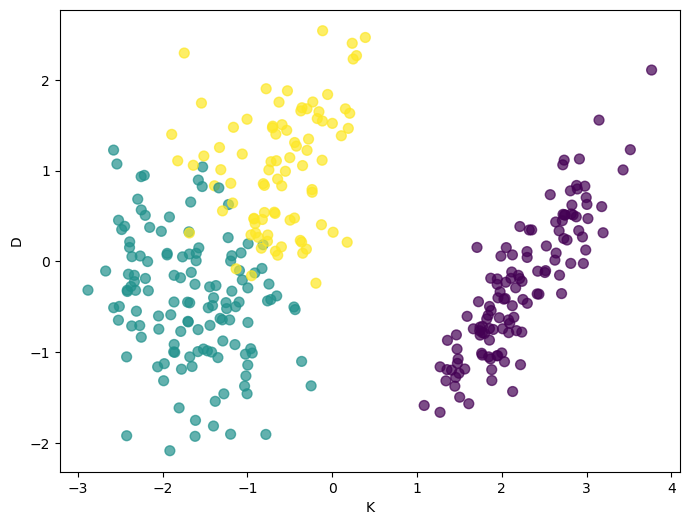

In [21]:
plt.figure(figsize=(8,6))
plt.xlabel('K')
plt.ylabel('D')
plt.scatter(stats[:, 0], stats[:, 1], s=50, c=clusters, alpha=0.7)

In [22]:
def generate_models(K_array, train):
    models = []
    for k in K_array:
        kmod = KMeans(n_clusters=k, n_init=5)
        kmod.fit(train)
        models.append(kmod)
    return models

k_array = np.arange(1,12)
models = generate_models(k_array, data)

NameError: name 'data' is not defined

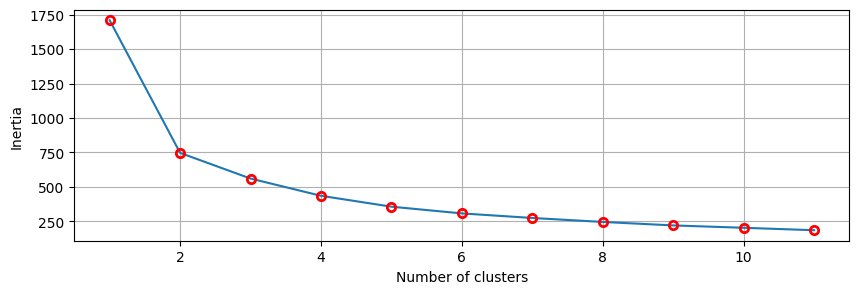

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(k_array, [m.inertia_ for m in models], marker='o', markersize=6, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

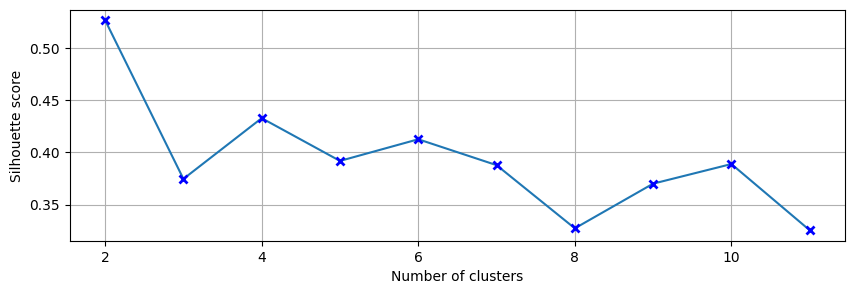

In [ ]:
def get_silhouette_scores(train, model_array):
    return [silhouette_score(train, labels=model.predict(train), sample_size=100) for model in model_array]

plt.figure(figsize=(10,3))
plt.plot(k_array[1:], get_silhouette_scores(data, models[1:]), marker='x', markersize=6, 
      markeredgewidth=2, markeredgecolor='b', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

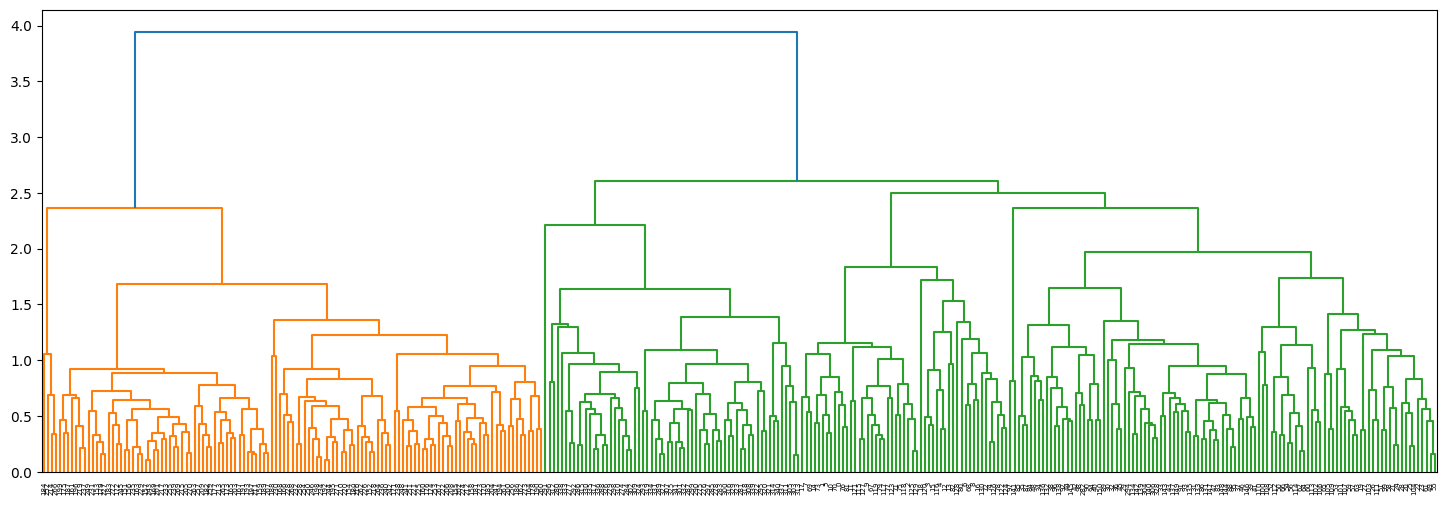

In [ ]:
plt.figure(figsize=(18,6))
linkage_data = linkage(pingvin_sc, method='average', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
clusters = hc.fit_predict(pingvin_sc)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,

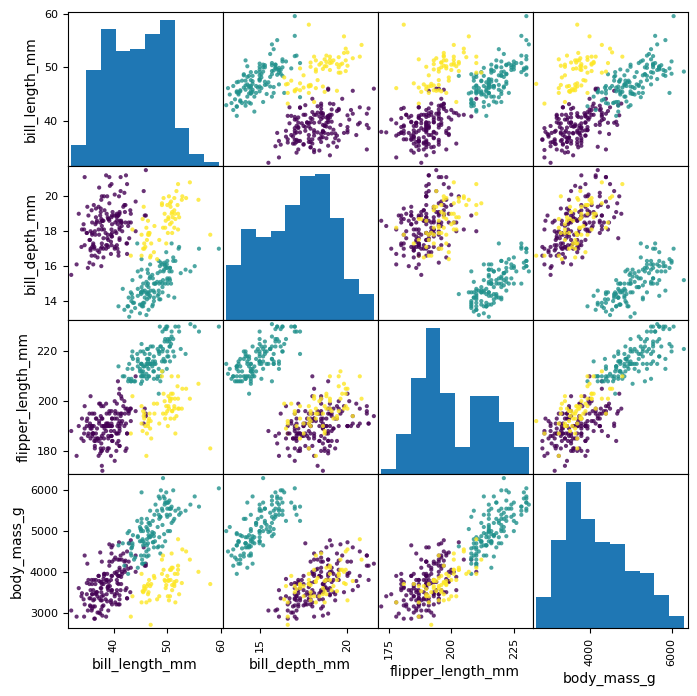

In [ ]:
_ = pd.plotting.scatter_matrix(pingvin.loc[:, pingvin.columns != 'island2'], alpha=0.8, figsize=(8,8), c=clusters)

In [ ]:
url="https://vargadaniel.web.elte.hu/bigdata24/pingvin_full.csv"
pingvin_full=pd.read_csv(url)

In [ ]:
pingvin_full.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
gt = pingvin_full.drop(['sex', 'year'], axis=1).dropna()['species']

In [ ]:
matrix = pd.DataFrame({ 'clusters': clusters, 'species': gt })
ct = pd.crosstab(matrix['clusters'], matrix['species'])
print(ct)

species   Adelie  Chinstrap  Gentoo
clusters                           
0            151          5       0
1              0          0     123
2              0         63       0
